# FACE RECOGNITION

## LINKS
### used packages:
- opencv2
- tensorflow

### extensions
- used model ->

## Links

In [3]:
import os
os.chdir("..")
os.getcwd()
import ipywidgets as widgets
import functools
from IPython.core.display import HTML
from IPython.display import Image , display
from src.DetectorAPI import Detector
from src.blur_faces import face_blurring
from src.detect_faces import detect_faces

In [4]:
# text widget to put in the path to the image
input_image = widgets.Text(
    value='Hello World',
    placeholder='Type something',
    description='String:',
    disabled=False
)

Text(value='Hello World', description='String:', placeholder='Type something')

In [5]:
# create output paths for image
detected_image = f"{input_image.value.split('/')[0]}/detected_{input_image.value.split('/')[-1]}"
blurred_image = f"{input_image.value.split('/')[0]}/blurred_{input_image.value.split('/')[-1]}"

# Detect Face

In [ ]:
def draw_rectangle(image , output_image : str , boxes : dict) -> None:
    """function to draw red rectangle around roi in image

    Args:
        image (array): image with face to blur
        boxes (dict): dict with coordinates where face was detected
        output_image (str): path where image with the detected face should be saved to
    """

    for box in boxes:
        x1 , y1 = box["x1"] , box["y1"]
        x2 , y2 = box["x2"] , box["y2"]

        # draw red rectangle
        rectangle = cv2.rectangle(image , (x1 , y1) , (x2 , y2) , (0,0,255) , 2)

        cv2.imwrite(output_image,rectangle)

In [ ]:
def detect_faces(input_path : str , threshold : float) -> None:
    """function to detect face in image

    Args:
        input_path (str): path to image to detect face
        threshold (float): value to decide wheater face fits Face Template or not
    """

    # if path to image doesn´t exists print out warning
    if not os.path.isfile(input_path):
        logging.error(f"invalid input file. Check if there are other file types besides images in the directory")

    # declare path to trained face model
    FACE_MODEL_PATH = "face_model/face.pb"

    input_path = "data/" if input_path == None else input_path
    threshold = 0.2 if threshold == None else threshold

    # call Detector Class
    detector = Detector(FACE_MODEL_PATH , name="detection")

    # get image name from input path and read in image as
    image_name = input_path.split("/")[-1]
    image = cv2.imread(input_path)
    
    # use detector class to detect face in image
    faces = detector.detect_objects(image , threshold)

    if len(faces) == 0 : pass

    # set output path
    output_image = f"data/detected_{image_name}"
    # draw rectangle around roi
    draw_rectangle(image,output_image,faces)

In [6]:
button = widgets.Button(description='detect faces')
display(button)

def on_button_clicked(b , rs_):
    detect_faces(rs_ , 0.2)
    
button.on_click(functools.partial(on_button_clicked ,rs_ = input_image.value))

Button(description='detect faces', style=ButtonStyle())

2022-05-27 19:18:50.739634: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-27 19:18:50.740842: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-27 19:18:51.074854: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:196] None of the MLIR optimization passes are enabled (registered 0 passes)


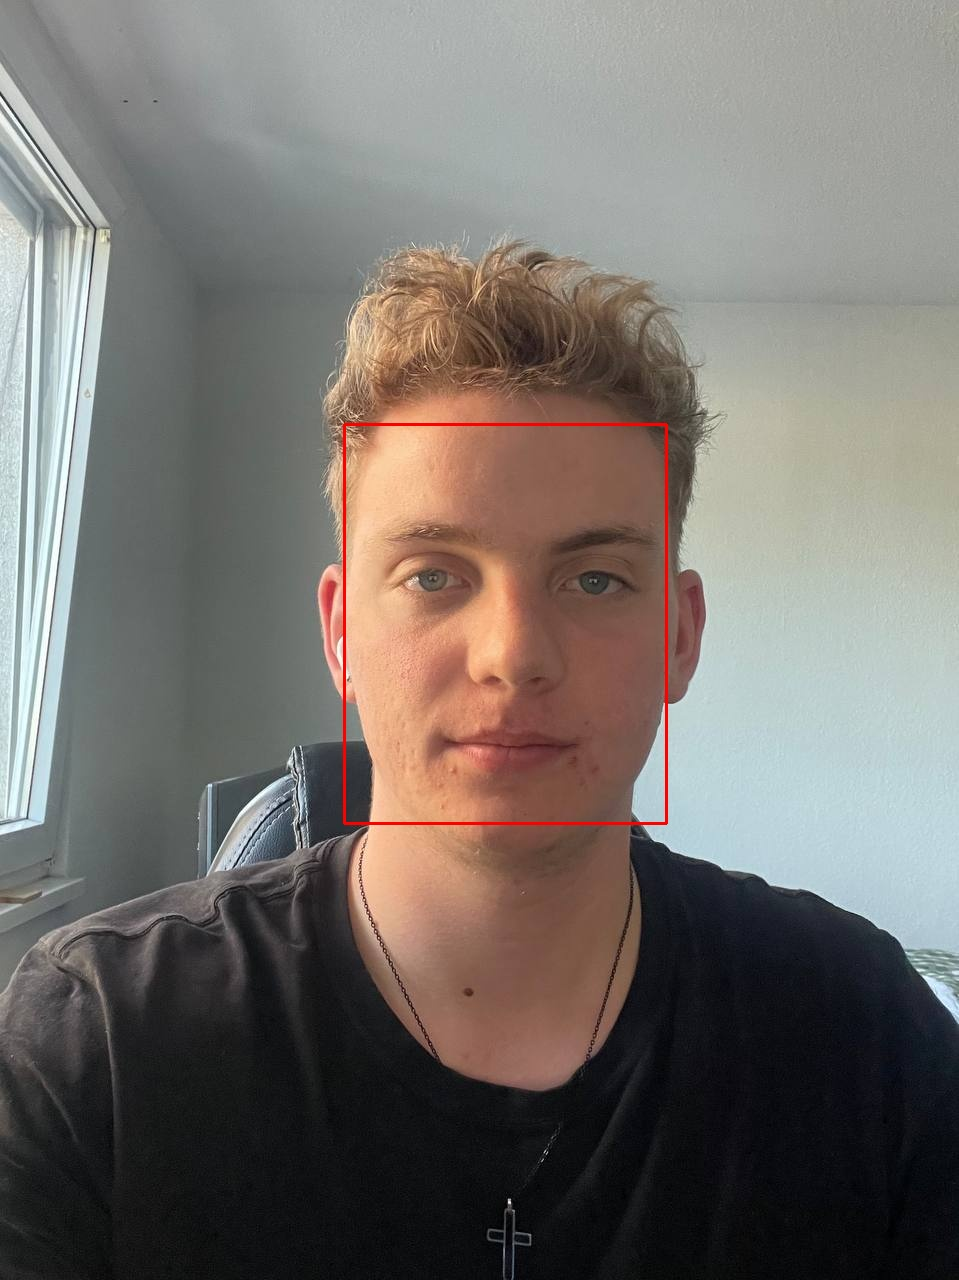

In [7]:
Image(filename = detected_image)

# Blur Face

In [ ]:
def blur_snippet(image, boxes : dict):
    """function to blur detected face in image

    Args:
        image (array): image with face to blur
        boxes (dict): dict with coordinates where face was detected
    """
    for box in boxes:
        # unpack each box
        x1 , y1 = box["x1"] , box["y1"]
        x2 , y2 = box["x2"] , box["y2"]

        # crop the image due to the current box
        sub = image[y1:y2 , x1:x2]

        # apply Blur in cropped area
        blur = cv2.blur(sub, (25,25))

        # paste blurred snippet
        image[y1:y2 , x1:x2] = blur


In [ ]:
def face_blurring(input_path : str , threshold : float) -> None:
    """function to blur face in image

    Args:
        input_path (str): path to image
        threshold (float): value to decide wheater face fits Face Template or not
    """

    # if path to image doesn´t exist print out warning
    if not os.path.isfile(input_path):
        logging.error(f"invalid input file. Check if there are other file types besides image files in the folder")

    # call Detector class
    detector = Detector("face_model/face.pb", name="detection")

    image_name = input_path.split("/")[-1]
    image = cv2.imread(input_path)
    
    # use detector class to detect face in image and store return in variable
    faces = detector.detect_objects(image,threshold)

    if len(faces) == 0 : pass
    
    output_image = f"data/blurred_{image_name}"
    image = blur_snippet(image, faces)
    cv2.imwrite(output_image, image)

In [11]:
button2 = widgets.Button(description="blur face")
display(button2)

def button_blur(b , rs_):
    face_blurring(rs_ , 0.2)
    
button.on_click(functools.partial(button_blur , rs_ = input_image.value))

Button(description='blur face', style=ButtonStyle())

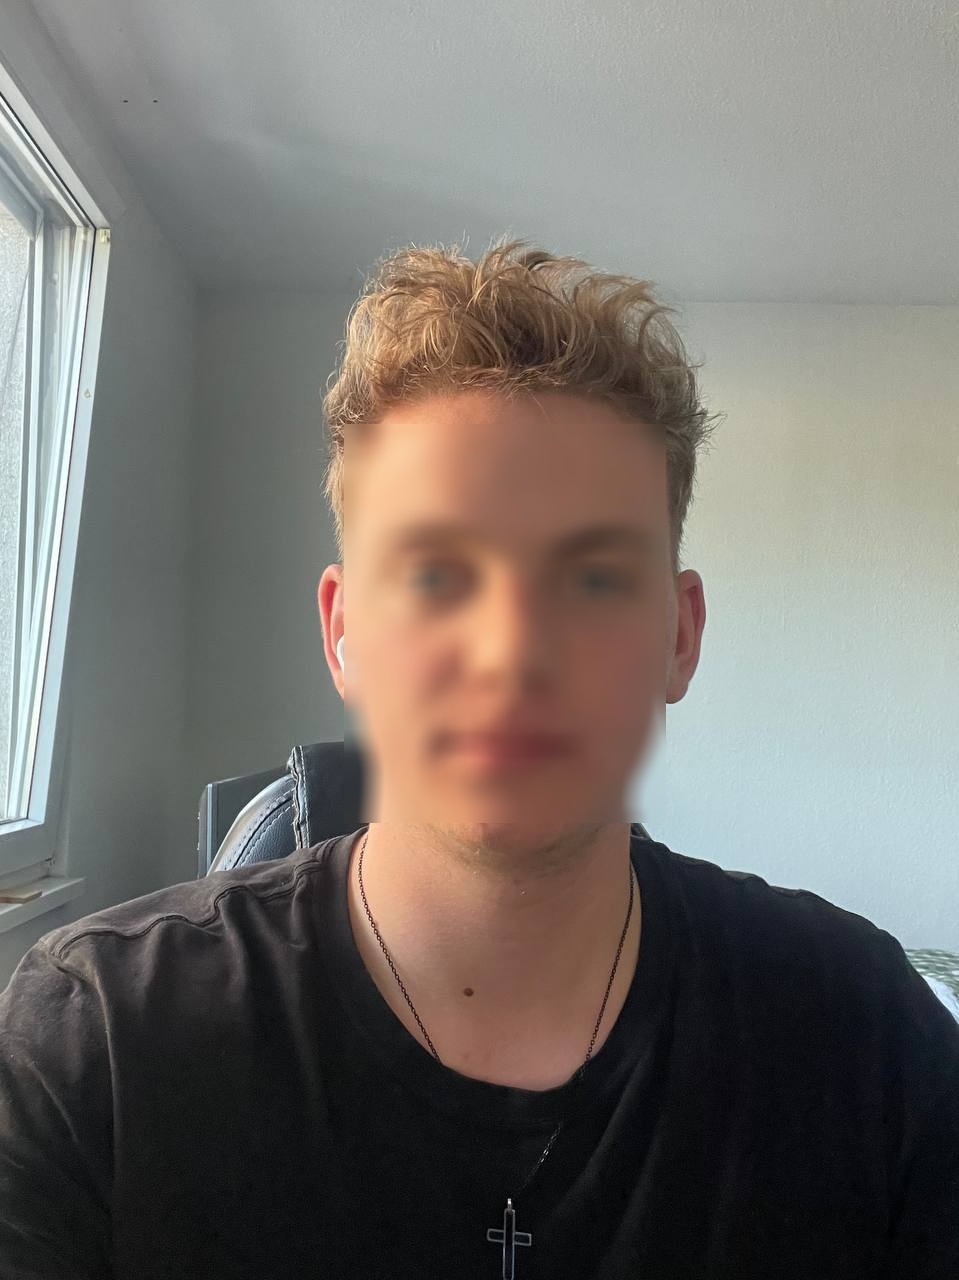

In [12]:
Image(filename = blurred_image)